In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics

tech_supp_df = pd.read_csv("technical_support_data.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [2]:
tech_supp_df.shape

(23, 8)

In [3]:
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


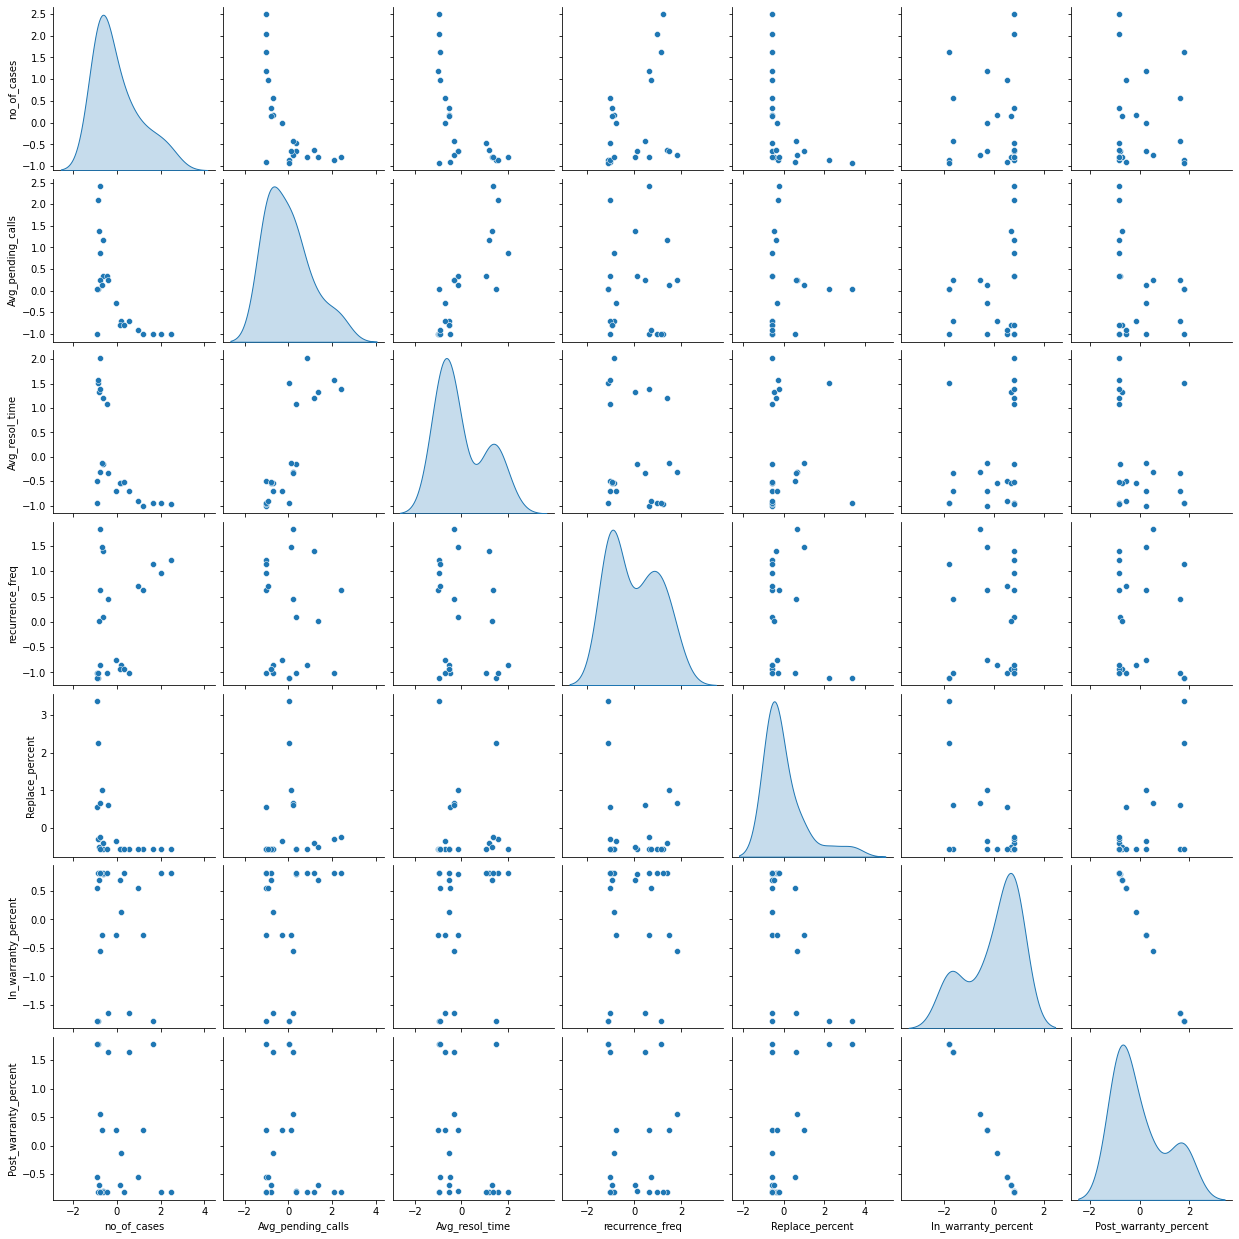

In [4]:
techSuppAttr=tech_supp_df.iloc[:,1:]
techSuppScaled=techSuppAttr.apply(zscore)
sns.pairplot(techSuppScaled,diag_kind='kde')

[[1.98409686]
 [4.64076513]
 [2.46895708]
 [5.15528441]
 [2.14371908]
 [3.01969159]
 [3.54936382]
 [2.26656615]
 [2.14290957]
 [2.82339513]
 [3.55692299]
 [2.86851801]
 [2.37063188]
 [3.21081736]
 [2.99389906]
 [3.41262078]
 [3.58036854]
 [1.85951876]
 [2.57711681]
 [2.0791192 ]
 [2.30218402]
 [2.00648658]
 [2.55092564]]
[[1.56241676 4.24386476]
 [4.30474376 6.25002112]
 [2.26975677 4.34842865]
 [4.53514495 7.13920473]
 [3.17456952 1.64921128]
 [4.09592043 1.50663569]
 [4.68927137 1.33703788]
 [2.07933669 4.20150446]
 [1.91750796 4.16406997]
 [4.01011697 0.30180372]
 [4.68625119 1.42439209]
 [2.2845286  5.07566027]
 [2.2138638  4.23297998]
 [4.34469008 1.17607233]
 [3.0123289  4.40066953]
 [3.38050072 4.77495426]
 [3.08900912 5.56461503]
 [1.30371999 4.25815158]
 [3.66842456 1.31073158]
 [2.2129717  3.69662723]
 [2.3068838  3.98823447]
 [2.08910293 3.72935159]
 [2.21951852 4.55810464]]
[[1.58872343 4.24386476 4.70149373]
 [4.8793049  6.25002112 1.35514062]
 [2.47589941 4.34842865 4.306

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

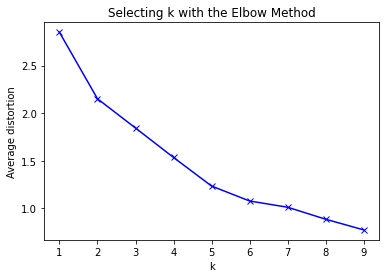

In [12]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(techSuppScaled)
    a = model.fit_transform(techSuppScaled)
    print(a)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [6]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [7]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,264.400000,1.150000,19.500000,0.140000,0.024000,77.500000,22.500000
1,35.000000,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
2,65.833333,1.966667,54.333333,0.148333,0.318333,23.333333,76.666667


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

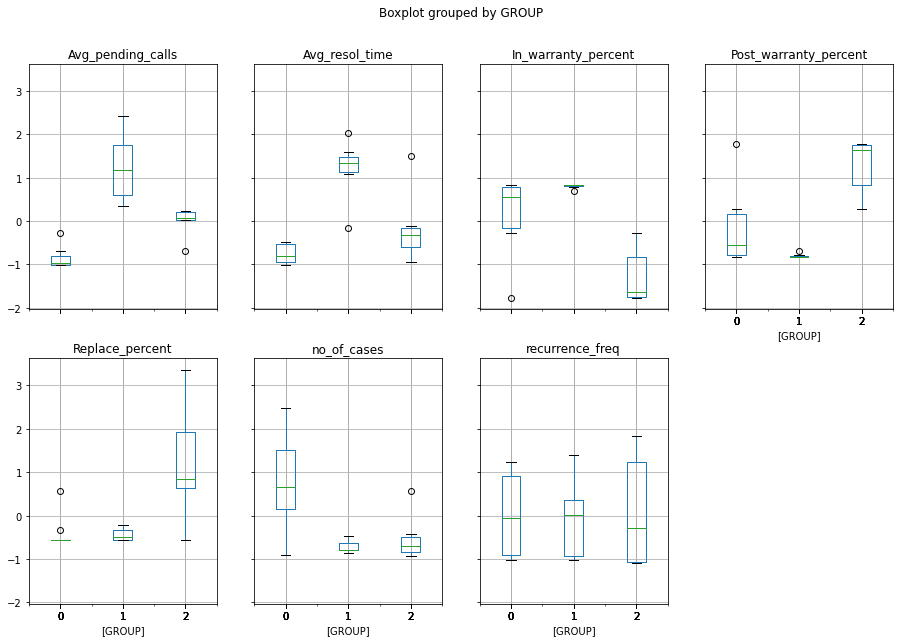

In [8]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [9]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,3
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,4
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,3
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,4
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [10]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,35.0,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
1,394.2,1.020000,8.000000,0.246000,0.000000,71.000000,29.000000
2,95.0,1.950000,42.000000,0.217500,0.177500,32.500000,67.500000
3,134.6,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000
4,7.5,2.000000,79.000000,0.010000,0.600000,5.000000,95.000000


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

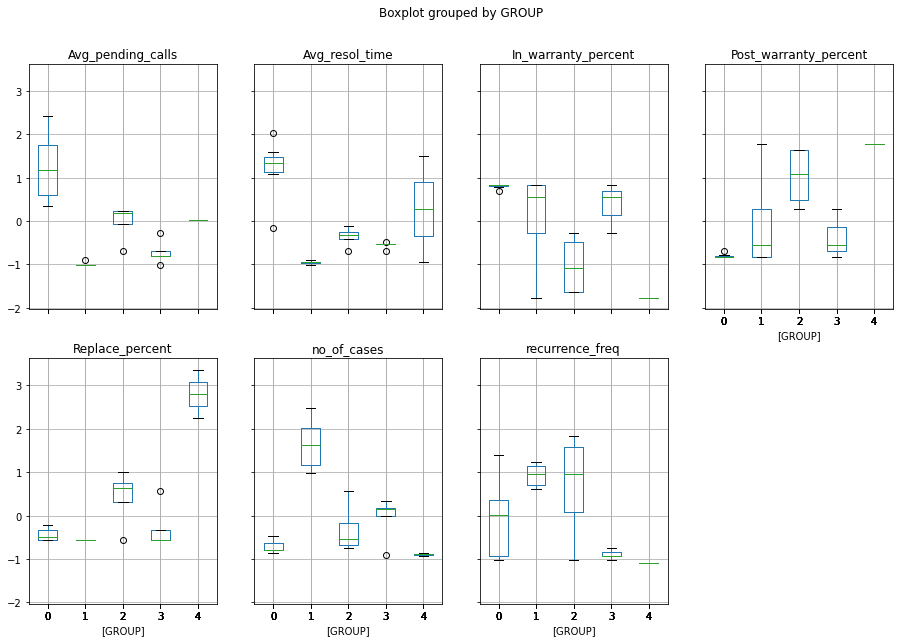

In [11]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))